# 第一次作业 词袋模型
## 英文文本

In [ ]:
import pandas as pd
# 读入数据
text_ana = pd.read_excel('text_analysis_twitter_sample.xlsx')
# 去掉名为'Unnamed: 0'的列
text_ana = text_ana.drop(['Unnamed: 0'], axis=1)
# show data
text_ana

,index,id,screen_name,time,link,text,source
0,49374,890587249372524544,auctnr1,2017-07-27T10:58:41-04:00,https://www.twitter.com/Reuters/statuses/89058...,"RT @Reuters MORE: Top U.S. general says, given...",Twitter for iPhone
1,83246,899354463055618048,SenatorTester,2017-08-20T15:36:27-04:00,https://www.twitter.com/SenatorTester/statuses...,T-minus 2 days until our first-ever Last Best ...,Twitter Web Client
2,100988,903272105738985472,KeithRothfus,2017-08-31T11:03:46-04:00,https://www.twitter.com/KeithRothfus/statuses/...,Please know that help is available. Visit http...,Twitter Web Client
3,193395,921001114409021440,HASCRepublicans,2017-10-19T09:12:31-04:00,https://www.twitter.com/HASCRepublicans/status...,Literally flying the wings off the A-10 in fig...,Twitter Web Client
4,12662,884911451449774080,SteveKnight25,2017-07-11T19:05:05-04:00,https://www.twitter.com/SteveKnight25/statuses...,Today the House unanimously passed my bill #HR...,Twitter Web Client
...,...,...,...,...,...,...,...
495,108175,905927436315086848,JeffFortenberry,2017-09-07T18:55:06-04:00,https://www.twitter.com/JeffFortenberry/status...,Great conversation with presidential historian...,Twitter Web Client
496,157423,915340759154409472,FlakeforSenate,2017-10-03T18:20:17-04:00,https://www.twitter.com/FlakeforSenate/statuse...,ICYMI over the weekend: @JeffFlake teams up wi...,TweetDeck
497,72173,896489606316773376,RepSeanMaloney,2017-08-12T17:52:32-04:00,https://www.twitter.com/RepSeanMaloney/statuse...,one of America's most beautiful &amp; welcomin...,Twitter for iPhone
498,232181,927641544819081216,ChrisMurphyCT,2017-11-06T15:59:13-05:00,https://www.twitter.com/SenatorDurbin/statuses...,RT @SenatorDurbin 94% of Americans (93% of gun...,Twitter for iPhone


### 构造预处理函数

In [ ]:
import re
# 定义一个预处理文本的函数
def preprocess_text(text):
    text = text.lower() # 全部小写
    text = re.sub(r'http\S+', '', text) # 去除url标签
    # 去除中文标点符号
    text = re.sub(r'，', '', text)
    stop_words = set(['to', 'the', 'for', 'and', 'of', 'this', 'in', 'on', 'rt', 'is', 'amp', 'our', 'you', 'we', 'with', 'at'
                      ,'it', 'qt', 'my', 'be', 'that', 'are', 'from', 'as', 'have', 'by', '&amp']) # 手动设置停用词list
    text = ' '.join([word for word in text.split() if word not in stop_words]) # 使用停用词
    return text

text_ana['text'] = text_ana['text'].apply(preprocess_text) # 将函数运用至dataframe上
# text_ana['text'].apply(preprocess_text)

In [19]:
text_ana

,index,id,screen_name,time,link,text,source
0,49374,890587249372524544,auctnr1,2017-07-27T10:58:41-04:00,https://www.twitter.com/Reuters/statuses/89058...,"@reuters more: top u.s. general says, given ch...",Twitter for iPhone
1,83246,899354463055618048,SenatorTester,2017-08-20T15:36:27-04:00,https://www.twitter.com/SenatorTester/statuses...,t-minus 2 days until first-ever last best outd...,Twitter Web Client
2,100988,903272105738985472,KeithRothfus,2017-08-31T11:03:46-04:00,https://www.twitter.com/KeithRothfus/statuses/...,please know help available. visit or call @sam...,Twitter Web Client
3,193395,921001114409021440,HASCRepublicans,2017-10-19T09:12:31-04:00,https://www.twitter.com/HASCRepublicans/status...,literally flying wings off a-10 fight against ...,Twitter Web Client
4,12662,884911451449774080,SteveKnight25,2017-07-11T19:05:05-04:00,https://www.twitter.com/SteveKnight25/statuses...,today house unanimously passed bill #hr2156 wh...,Twitter Web Client
...,...,...,...,...,...,...,...
495,108175,905927436315086848,JeffFortenberry,2017-09-07T18:55:06-04:00,https://www.twitter.com/JeffFortenberry/status...,great conversation presidential historian mich...,Twitter Web Client
496,157423,915340759154409472,FlakeforSenate,2017-10-03T18:20:17-04:00,https://www.twitter.com/FlakeforSenate/statuse...,icymi over weekend: @jeffflake teams up arizon...,TweetDeck
497,72173,896489606316773376,RepSeanMaloney,2017-08-12T17:52:32-04:00,https://www.twitter.com/RepSeanMaloney/statuse...,one america's most beautiful &amp; welcoming c...,Twitter for iPhone
498,232181,927641544819081216,ChrisMurphyCT,2017-11-06T15:59:13-05:00,https://www.twitter.com/SenatorDurbin/statuses...,@senatordurbin 94% americans (93% gun owners) ...,Twitter for iPhone


### 提取X特征矩阵

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer # 从sklearn导入CountVectorizer

vectorizer = CountVectorizer() # 实例化

X = vectorizer.fit_transform(text_ana['text']) # 从text中提取特征矩阵X

# print X
print('shape:', X.shape)

print('feature list:', vectorizer.get_feature_names_out()[900:1000])

shape: (500, 3562)
feature list: ['departments' 'depend' 'deploy' 'deportation' 'deporting' 'dept'
 'deserve' 'deserves' 'desperate' 'desperately' 'despicable' 'destroyed'
 'destructive' 'detailed' 'details' 'detained' 'detecting' 'detention'
 'devastated' 'devastation' 'develop' 'development' 'devoted' 'dhs'
 'dhsgov' 'did' 'didn' 'difference' 'difficult' 'dignity'
 'dignityandjustice' 'dinner' 'dir' 'dire' 'directamente' 'director'
 'directors' 'disabled' 'disabling' 'disadvantages' 'disagree' 'disaster'
 'disastrous' 'disclose' 'discriminate' 'discriminated' 'discrimination'
 'discuss' 'discusses' 'discussing' 'discussion' 'disgraceful'
 'disgusting' 'dismal' 'dismantling' 'disney' 'displaced' 'dispute'
 'disregard' 'dist' 'distributing' 'district' 'disturbing' 'diverse'
 'diversity' 'division' 'do' 'dobbs' 'doctors' 'documents' 'dod' 'dodd'
 'dodging' 'doe' 'does' 'doesn' 'doing' 'doj' 'dollars' 'domestic'
 'dominoes' 'don' 'donald' 'donate' 'donations' 'done' 'donjbacon' 'donna'
 

In [21]:
for i in range(X.shape[0]):
    print(X[i].toarray())

[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 1 0]]
[[0 0 0 ... 0 0 1]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


### 根据特征词提取词频

In [22]:
feature_words = vectorizer.get_feature_names_out()

word_freq = dict(zip(feature_words, X.sum(axis=0).A1))

In [23]:
sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

[('amp', 96),
 ('trump', 41),
 ('tax', 40),
 ('who', 40),
 ('today', 38),
 ('will', 37),
 ('not', 36),
 ('here', 32),
 ('all', 30),
 ('your', 30),
 ('an', 28),
 ('new', 28),
 ('bill', 27),
 ('thank', 27),
 ('their', 27),
 ('what', 27),
 ('about', 26),
 ('it', 26),
 ('more', 26),
 ('us', 26),
 ('get', 25),
 ('has', 25),
 ('he', 25),
 ('must', 25),
 ('need', 25),
 ('great', 23),
 ('help', 23),
 ('his', 23),
 ('house', 23),
 ('people', 23),
 ('work', 23),
 ('health', 22),
 ('they', 22),
 ('was', 22),
 ('can', 21),
 ('families', 21),
 ('just', 21),
 ('up', 21),
 ('americans', 20),
 ('congress', 20),
 ('day', 20),
 ('one', 20),
 ('support', 20),
 ('act', 19),
 ('if', 19),
 ('live', 19),
 ('now', 19),
 ('care', 18),
 ('no', 18),
 ('them', 18),
 ('working', 18),
 ('would', 18),
 ('you', 18),
 ('senate', 17),
 ('american', 16),
 ('been', 16),
 ('national', 16),
 ('out', 16),
 ('proud', 16),
 ('those', 16),
 ('do', 15),
 ('family', 15),
 ('gop', 15),
 ('me', 15),
 ('when', 15),
 ('against', 14)

In [16]:
!pip install wordcloud

### 绘制词云

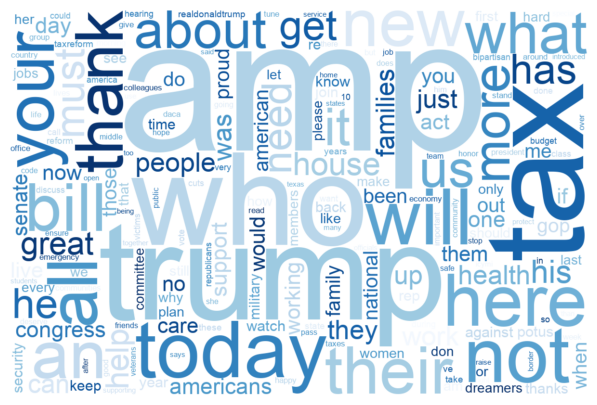

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


wc = WordCloud(
    width=1200, # 图的宽度
    height=800, # 图的高度
    max_words=200, # 图显示的最大词数
    colormap='Blues', # 字体颜色风格
    background_color='white', # 图背景颜色
    font_path = '/System/Library/Fonts/Supplemental/Arial.ttf' # 字体
).generate_from_frequencies(word_freq) # 数据来源

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show() # 画图


## 中文文本（到此为止，别往下看了ovo）

### 读取数据

In [ ]:
text_ana_zh = pd.read_excel('text_analysis_weibo_sample.xlsx') # 读取数据
text_ana_zh = text_ana_zh.drop(['Unnamed: 0'], axis=1) # 去掉名为'Unnamed: 0'的列
text_ana_zh

,index,标题/微博内容,点赞,转发,评论,账号昵称UID加密,粉丝数,关注数,地域
0,34121,国债：地产行业重磅利好提振风险偏好，期债低开低走 国债期货全线收跌，10年期主力...,0,0,0,e5df796860e68f403bcf9651bab4d42e,0,0,其他
1,40230,#喜迎二十大 忠诚保平安#,0,0,0,6e35cb69ad52f20de5e28197b2e85306,405444,252,广西
2,7714,注意！事关明日教资考试！福建省教育考试院发布补充公告 福建省2022年下半年全国中小学教师...,0,0,0,e6953217442e6c06a7af23eee5e185f2,53264,2177,福建
3,27378,近日，“千年大计”雄安新区迎来五周岁生日。从“一张白纸...,0,0,0,NaN,0,0,北京
4,15435,樊振东牛逼！,0,0,0,344af41eac516375c04dee6325e763cc,8,51,山东
...,...,...,...,...,...,...,...,...,...
95,14034,老公好漂亮[舔屏],0,0,0,aa7af97ae98cbe8983e559b948ecfabf,825,191,北京
96,35249,恭喜@张小娜呀娜 1名用户获得【小飞T】。C官方唯一抽奖工具@C抽奖平台 对本次抽奖进行监督...,0,0,2,f538513e5801c275cbcf285517a8ee62,51709,20,北京
97,39598,接不动了，居民部门负债率提升空间太有限了。现在动辄几万一平米，总价高，月供高，预期转差，还怎...,0,0,0,2e76c39b6665a0b6f5bdc4c35f36f573,0,59,四川
98,48977,目前电子烟政策已从制定阶段逐渐走向实施阶段，而主要的电子烟公司股价下跌幅度高达70%-...,0,0,0,NaN,0,0,北京


### 分词

In [ ]:
# 在dataframe上运用预处理函数
import jieba
text_ana_zh['标题/微博内容'] = text_ana_zh['标题/微博内容'].apply(preprocess_text)

# 构造jieba分词函数，分词核心逻辑为.cut
def cut_words(text):
    return ' '.join(jieba.cut(text))

# 在dataframe上运用分词函数
text_ana_zh['分词'] = text_ana_zh['标题/微博内容'].apply(cut_words)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/9x/j_7cm_y109b5sg5tpf7h7gxm0000gn/T/jieba.cache
Loading model cost 0.298 seconds.
Prefix dict has been built successfully.


In [28]:
text_ana_zh

,index,标题/微博内容,点赞,转发,评论,账号昵称UID加密,粉丝数,关注数,地域,分词
0,34121,国债：地产行业重磅利好提振风险偏好期债低开低走 国债期货全线收跌10年期主力合约...,0,0,0,e5df796860e68f403bcf9651bab4d42e,0,0,其他,国债 ： 地产 行业 重磅 利好 提振 风险 偏好 期债 低开 低 走 ...
1,40230,#喜迎二十大 忠诚保平安#,0,0,0,6e35cb69ad52f20de5e28197b2e85306,405444,252,广西,# 喜迎 二十大 忠诚 保平安 #
2,7714,注意！事关明日教资考试！福建省教育考试院发布补充公告 福建省2022年下半年全国中小学教师...,0,0,0,e6953217442e6c06a7af23eee5e185f2,53264,2177,福建,注意 ！ 事关 明日 教资 考试 ！ 福建省 教育 考试院 发布 补充 公告 福建省...
3,27378,近日“千年大计”雄安新区迎来五周岁生日。从“一张白纸”...,0,0,0,NaN,0,0,北京,近日 “ 千年 ...
4,15435,樊振东牛逼！,0,0,0,344af41eac516375c04dee6325e763cc,8,51,山东,樊振东 牛 逼 ！
...,...,...,...,...,...,...,...,...,...,...
95,14034,老公好漂亮[舔屏],0,0,0,aa7af97ae98cbe8983e559b948ecfabf,825,191,北京,老公 好 漂亮 [ 舔 屏 ]
96,35249,恭喜@张小娜呀娜 1名用户获得【小飞t】。c官方唯一抽奖工具@c抽奖平台 对本次抽奖进行监督...,0,0,2,f538513e5801c275cbcf285517a8ee62,51709,20,北京,恭喜 @ 张小娜 呀 娜 1 名 用户 获得 【 小飞 t 】 。 c 官方 唯一 抽奖...
97,39598,接不动了居民部门负债率提升空间太有限了。现在动辄几万一平米总价高月供高预期转差还怎么涨？？？...,0,0,0,2e76c39b6665a0b6f5bdc4c35f36f573,0,59,四川,接不动 了 居民 部门 负债率 提升 空间 太 有限 了 。 现在 动辄 几万 一 平米 总...
98,48977,目前电子烟政策已从制定阶段逐渐走向实施阶段而主要的电子烟公司股价下跌幅度高达70%-9...,0,0,0,NaN,0,0,北京,目前 电子 烟 政策 已 从 制定 阶段 逐渐 走向 实施 阶段 而 主要 的 ...


### 提取X特征向量

In [ ]:
vectorizer = CountVectorizer() # 实例化vectorizer

X = vectorizer.fit_transform(text_ana_zh['分词']) # 提取特征矩阵X


# 展示特征矩阵
print('shape:', X.shape)

print('feature list:', vectorizer.get_feature_names_out()[900:1000])

shape: (100, 5816)
feature list: ['下行' '下调' '下跌' '下车' '下载' '下载安装' '下辖' '下达' '下逢' '下锌价' '下降' '下雨' '下雨天'
 '不一三大' '不了' '不仅' '不仅仅' '不会' '不佳' '不偷' '不利于' '不到' '不及' '不变' '不可否认' '不同'
 '不增' '不够' '不大' '不好' '不如' '不少' '不得' '不扰' '不敢' '不断' '不断加强' '不断深入' '不明'
 '不明朗' '不是' '不曾' '不满情绪' '不用' '不看' '不确定性' '不管' '不胜枚举' '不能' '不良贷款' '不要' '不见'
 '不足' '不足以' '不过' '不锈钢' '不错' '不靠' '不齐' '与时俱进' '与此同时' '专业' '专卖店' '专家' '专注'
 '专班' '专用' '专用肥' '专精' '专访' '专门' '专项' '且锡价' '世乒赛' '世界' '世界屋脊' '世界贸易组织'
 '世界遗产' '丙烷' '业务' '业务管理' '业态' '业绩' '业者' '东京' '东北' '东南亚' '东家' '东山再起' '东数'
 '东方' '东海县' '东经' '东莞' '东西' '丝绸' '两个' '两位数' '两倍' '两名']


In [71]:
for i in range(X.shape[0]):
    print(X[i].toarray())

[[1 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 2]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[4 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 1 1 ... 0 1 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


### 根据特征词提取词频

In [11]:
feature_words = vectorizer.get_feature_names_out()

word_freq = dict(zip(feature_words, X.sum(axis=0).A1))

sorted (word_freq.items(), key=lambda x: x[1], reverse=True)

[('万吨', 170),
 ('市场', 168),
 ('库存', 103),
 ('中国', 93),
 ('预期', 92),
 ('需求', 88),
 ('下降', 82),
 ('电子', 82),
 ('加息', 75),
 ('同比', 75),
 ('上涨', 74),
 ('价格', 74),
 ('环比', 74),
 ('增长', 72),
 ('亿元', 71),
 ('经济', 70),
 ('反弹', 69),
 ('国内', 69),
 ('方面', 69),
 ('继续', 69),
 ('现货', 68),
 ('重要', 65),
 ('企业', 63),
 ('合约', 62),
 ('美联储', 62),
 ('行情', 62),
 ('政策', 60),
 ('10', 57),
 ('出口', 57),
 ('2022', 56),
 ('期货', 55),
 ('关注', 54),
 ('美元', 54),
 ('发展', 52),
 ('目前', 52),
 ('预计', 52),
 ('数据', 51),
 ('11', 49),
 ('公司', 49),
 ('交易', 48),
 ('报告', 48),
 ('2021', 46),
 ('增加', 46),
 ('持续', 46),
 ('影响', 45),
 ('策略', 45),
 ('郑州', 45),
 ('数字', 44),
 ('装置', 44),
 ('产量', 43),
 ('近期', 43),
 ('美国', 42),
 ('28', 41),
 ('减少', 41),
 ('可能', 41),
 ('显示', 41),
 ('原油', 40),
 ('城市', 40),
 ('建设', 39),
 ('来看', 38),
 ('重庆', 38),
 ('主要', 37),
 ('截至', 37),
 ('计划', 37),
 ('资讯', 37),
 ('国家', 36),
 ('震荡', 36),
 ('12', 35),
 ('复盘', 35),
 ('建议', 35),
 ('开工率', 35),
 ('短期', 35),
 ('下游', 34),
 ('考生', 34),
 ('风险', 34),
 ('主力', 33),
 ('

In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib


default_font_path = matplotlib.font_manager.FontProperties(family='DejaVu Sans').get_file()


wc = WordCloud(
    width=1200,
    height=800,
    max_words=200,
    colormap='Blues',
    background_color='white',
    font_path='SimSun.ttc'
).generate_from_frequencies(word_freq)


# plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

NameError: name 'word_freq' is not defined